<a href="https://colab.research.google.com/github/ajinkyabhanudas/SIADS696/blob/dev/Dataset_setup_Ajinkya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook works on the first step of the train pipeline: data loading 
- The idea is to use the contents of this notebook as a makefile target so it can be the first step to run as we keep populating our datastore.








In [1]:
!git clone https://github.com/ajinkyabhanudas/SIADS696.git

Cloning into 'SIADS696'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 390 (delta 79), reused 84 (delta 39), pack-reused 221
Receiving objects: 100% (390/390), 20.34 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (203/203), done.


In [84]:
import enum
import glob
import json
import os
import re
from itertools import groupby

import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

In [87]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
try:
  os.chdir('SIADS696')
except:
  print("You're either already in the SIADS696 directory, or the path specified isn't accessible")

### We'll extract our dataset in two parts:
- first extract the overall stats data per channel and store it along with the channel name instead of the id for available channels. (`overall_stats_raw_df`)
- And second, extract the per-video data into another dataframe. (`raw_df`)

In [4]:
rootdir = 'data'
feature_list = ['publishedAt', 'title', 'channelId', 'description',
                'channelTitle', 'tags', 'categoryId', 'viewCount', 
                'likeCount', 'favoriteCount', 'commentCount', 'duration',
                'definition', 'contentRating', 'topicCategories']

ov_dict_list = []
ov_temp_dict = {}

dict_list = []
temp_dict = {}

for path in glob.glob(f'./{rootdir}/*/*'):
  try:
    with open(path, "r") as read_file:
      data = json.load(read_file)
    for channel_id in data.keys():
      ov_temp_dict = data[channel_id]["channel_statistics"]
      channel_name = list(data[channel_id]["video_data"].keys())[0]
      ov_temp_dict["channelName"] = data[channel_id]["video_data"][channel_name]["channelTitle"]
      ov_dict_list.append(ov_temp_dict)
      
      for video_info in data[channel_id]["video_data"].values():
        temp_dict = video_info
        dict_list.append(temp_dict)       
  except:
    pass

overall_stats_raw_df = pd.DataFrame(ov_dict_list)
overall_stats_raw_df.drop("hiddenSubscriberCount", axis=1, inplace=True)

raw_df = pd.DataFrame(dict_list)
raw_df = raw_df[feature_list]

### Next, let's do a quick check on the data and take a quick look at the data in both the dfs

In [5]:
raw_df.info()
raw_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33696 entries, 0 to 33695
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   publishedAt      33696 non-null  object
 1   title            33696 non-null  object
 2   channelId        33677 non-null  object
 3   description      33677 non-null  object
 4   channelTitle     33677 non-null  object
 5   tags             32423 non-null  object
 6   categoryId       33677 non-null  object
 7   viewCount        33648 non-null  object
 8   likeCount        33200 non-null  object
 9   favoriteCount    33676 non-null  object
 10  commentCount     33235 non-null  object
 11  duration         33674 non-null  object
 12  definition       33674 non-null  object
 13  contentRating    33674 non-null  object
 14  topicCategories  33109 non-null  object
dtypes: object(15)
memory usage: 3.9+ MB


,publishedAt,title,channelId,description,channelTitle,tags,categoryId,viewCount,likeCount,favoriteCount,commentCount,duration,definition,contentRating,topicCategories
21133,2017-06-30T20:39:39Z,Can You Flush 1 Million Orbeez Down the Toilet...,UCJcycnanWtyOGcz34jUlYZA,Can You Flush 1 Million Orbeez Down the Toilet...,IncredibleScience,"[orbeez, polymer balls, giant orbeez, orbeez p...",1,357264,3721,0,2540,PT13M12S,hd,{},"[https://en.wikipedia.org/wiki/Hobby, https://..."
16987,2016-06-14T15:02:50Z,Why wasn’t the Bill of Rights originally in th...,UCsooa4yRKGN_zEE8iknghZA,View full lesson: http://ed.ted.com/lessons/wh...,TED-Ed,"[James Coll, Augenblick Studios, Addison Ander...",27,666220,6228,0,501,PT4M33S,hd,{},[https://en.wikipedia.org/wiki/Society]
26271,2012-01-11T09:35:53Z,"Strength, Balance & Flexibility Exercises for ...",UCiP6wD_tYlYLYh3agzbByWQ,Find out how & why this Golf workout works: ht...,FitnessBlender,"[Strength, Balance, Flexibility, Exercises for...",17,229135,1523,0,38,PT35M11S,hd,{},"[https://en.wikipedia.org/wiki/Golf, https://e..."
28155,2020-09-15T03:55:36Z,"Tariq’s Irk List: No-Shoe Homes, Mostly Melon ...",UC8-Th83bH_thdKZDJCrn88g,The Roots' Tariq Trotter shares some of the th...,The Tonight Show Starring Jimmy Fallon,"[The Tonight Show, Jimmy Fallon, Tariq’s Irk L...",23,69684,2410,0,238,PT7M37S,hd,{},"[https://en.wikipedia.org/wiki/Entertainment, ..."
7764,2016-09-26T15:23:28Z,Pua‘a | Animal Guide| Hawaiʻi | Expedia,UCGaOvAFinZ7BCN_FDmw74fQ,"Meet Pua‘a, the pig. Hawaiʻi’s friendly, bold ...",Expedia,"[Pua'a, Hawaii, Expedia]",19,8776,59,0,2,PT32S,hd,{},"[https://en.wikipedia.org/wiki/Hobby, https://..."


In [6]:
overall_stats_raw_df.info()
overall_stats_raw_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   viewCount        86 non-null     object
 1   subscriberCount  86 non-null     object
 2   videoCount       86 non-null     object
 3   channelName      86 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


,viewCount,subscriberCount,videoCount,channelName
73,4981263404,17700000,154,Lele Pons
62,20257607432,29700000,10886,Spinnin' Records
72,10202737923,25000000,1387,Smosh
17,9604402702,14300000,177413,ABS-CBN News
44,1996717211,7460000,8321,Khan Academy


### Let's examine our datatypes and convert them appropriately

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33696 entries, 0 to 33695
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   publishedAt      33696 non-null  object
 1   title            33696 non-null  object
 2   channelId        33677 non-null  object
 3   description      33677 non-null  object
 4   channelTitle     33677 non-null  object
 5   tags             32423 non-null  object
 6   categoryId       33677 non-null  object
 7   viewCount        33648 non-null  object
 8   likeCount        33200 non-null  object
 9   favoriteCount    33676 non-null  object
 10  commentCount     33235 non-null  object
 11  duration         33674 non-null  object
 12  definition       33674 non-null  object
 13  contentRating    33674 non-null  object
 14  topicCategories  33109 non-null  object
dtypes: object(15)
memory usage: 3.9+ MB


In [8]:
def duration_split(duration):
    try:
      for _, v in groupby(duration, str.isalpha):
        yield ''.join(v)
    except:
      yield np.nan
    
    
def duration_2_secs(duration, duration_split=duration_split):
  temp = 0
  # value = (duration_split(duration))
  for i, val in enumerate(duration_split(duration)):
    
    if i==1 and not val.isalpha():
      temp += float(val)*60
    
    if i==3 and not val.isalpha():
      temp += float(val)

  return(temp)


# duration_2_secs("PT51M12S")

In [9]:
def topic_extract(links_list):
  
  topics_list = []  
  try:
    for link in links_list:
      topics_list.append(link.split("/")[-1].lower())
    
    return(topics_list)
  except:
    pass

In [121]:
def text_prep(val):
  '''the goal is to replace the hypertexts in the 
  in any field to redundant names as vectorizing
  them could be misleading and also leak data'''

  val = str(val).lower()
  process_desc = re.sub(r'http[s]*:.*\w', 'url', val)
  process_desc = re.sub('[^a-zA-Z]', ' ', process_desc)
  process_desc = re.sub(r'\s+', ' ', process_desc)

  process_desc = nltk.sent_tokenize(process_desc)
  process_desc = [nltk.word_tokenize(word) for word in process_desc if word not in stopwords.words('english')]
  try:
    return(process_desc[0])
  except:
    return(process_desc)

In [122]:
def create_dataset(df, featureset, primary=True):

  if primary:
    df["publishedAt"] = pd.to_datetime(df.publishedAt)
    df['publishedDayNum'] = df.publishedAt.apply(lambda x: x.timetuple().tm_yday)
    df["categoryId"] = df.categoryId.astype(float)
    df["viewCount"] = df.viewCount.astype(float)
    df["likeCount"] = df.likeCount.astype(float)
    df["favoriteCount"] = df.favoriteCount.astype(float)
    df["commentCount"] = df.commentCount.astype(float)
    df['duration_secs'] = df.duration.apply(lambda x: duration_2_secs(x))
    df['topicCategories'] = df.topicCategories.apply(lambda x: topic_extract(x))
    df['tags'] = df.tags.apply(lambda x: topic_extract(x))
    df['channelTitle'] = df.channelTitle.apply(lambda x: text_prep(x))
    df['description'] = df.description.apply(lambda x: text_prep(x))
    df['title'] = df.title.apply(lambda x: text_prep(x))
  
  else:
    df['ov_viewCount'] = df.viewCount.astype(float)
    df['ov_subscriberCount'] = df.subscriberCount.astype(float)
    df['ov_videoCount'] = df.videoCount.astype(float)
    df['channelName'] = df.channelName.str.lower()

  return df[featureset]

- It's best to drop tags because, in many cases, the tags tend to contain the channel names, which could as we speculated earlier, lead to data leaks.
- We'll also drop channelId because it is visually unintuitve and we can encode the channelNames with simple Id's if we needed to.
- since we don't have data in the order of millions, we'd abstract out the publishing data to a new variable of `publishedDayNum` that contains the day of the year the video was published.
- on examining `contentRating` values, the dataset in non-null but majorly contains empty dictionaries, which makes it misleading. As a result, we'll drop this feature too.
- on examining `favoriteCount` values, the dataset in non-null but majorly contains a value of `0`, which makes it misleading. As a result, we'll drop it.

- dropped columns list [`tags`, `channelId`, `contentRating`] and [`publishedAt`] after deriving the `publishedDayNum` column from it.

In [123]:
features = ['title', 'description', 'channelTitle',
 'categoryId', 'viewCount', 'likeCount',
 'commentCount', 'duration_secs','definition', 
 'topicCategories', 'publishedDayNum']

preproc1_df = create_dataset(raw_df, features)

In [124]:
# text_prep(val.values[0]), val.values[0]

In [125]:
preproc1_df.sample(5)

,title,description,channelTitle,categoryId,viewCount,likeCount,commentCount,duration_secs,definition,topicCategories,publishedDayNum
11615,"[welcome, to, move, a, day, yoga, journey, yog...","[join, me, for, a, group, breath, let, us, gat...","[yoga, with, adriene]",26.0,1894275.0,51413.0,2952.0,396.0,hd,[lifestyle_(sociology)],1
6640,"[who, iginiit, na, di, pa, tapos, ang, covid, ...","[muling, iginiit, ng, world, health, organizat...","[abs, cbn, news]",25.0,2182.0,19.0,9.0,210.0,hd,[society],266
25825,"[exercise, tutorial, squat]","[how, to, do, the, move, stand, with, your, fe...","[xhit, daily]",17.0,631841.0,2993.0,19.0,2940.0,hd,"[lifestyle_(sociology), physical_fitness]",269
26192,"[quick, rep, abs, workout, intense, ab, workou...","[calorie, burn, info, printable, routine, url,...",[fitnessblender],26.0,286972.0,2681.0,53.0,443.0,hd,"[lifestyle_(sociology), physical_fitness]",234
11601,"[day, reset, move, a, day, yoga, journey]","[knock, knock, it, s, me, you, made, it, to, d...","[yoga, with, adriene]",26.0,1173174.0,24678.0,1269.0,1201.0,hd,"[lifestyle_(sociology), physical_fitness]",16


In [126]:
preproc1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33696 entries, 0 to 33695
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            33696 non-null  object 
 1   description      33696 non-null  object 
 2   channelTitle     33696 non-null  object 
 3   categoryId       33677 non-null  float64
 4   viewCount        33648 non-null  float64
 5   likeCount        33200 non-null  float64
 6   commentCount     33235 non-null  float64
 7   duration_secs    33696 non-null  float64
 8   definition       33674 non-null  object 
 9   topicCategories  33109 non-null  object 
 10  publishedDayNum  33696 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 2.8+ MB


Let's again take a look at what percentage of data is missing across all the fields.

In [127]:
missing_data_perc_cols = (preproc1_df.isna().sum()/len(preproc1_df))*100
missing_data_perc_cols

title              0.000000
description        0.000000
channelTitle       0.000000
categoryId         0.056387
viewCount          0.142450
likeCount          1.471985
commentCount       1.368115
duration_secs      0.000000
definition         0.065290
topicCategories    1.742047
publishedDayNum    0.000000
dtype: float64

In [128]:
lost_rows_perc = len(preproc1_df.dropna())/len(preproc1_df)*100
lost_rows_perc

95.58404558404558

It's under 5% in across all cases, which isn't a bad thing at all and we can easily consider dropping the missing fields as we would regularly keep enriching our datastore, which would easily compensate for the missing 5% over time.

In [129]:
preproc2_df = create_dataset(raw_df, features).dropna()

In [130]:
preproc2_df.isna().sum()

title              0
description        0
channelTitle       0
categoryId         0
viewCount          0
likeCount          0
commentCount       0
duration_secs      0
definition         0
topicCategories    0
publishedDayNum    0
dtype: int64

In [131]:
preproc2_df.drop('categoryId', axis=1).describe()

,viewCount,likeCount,commentCount,duration_secs,publishedDayNum
count,3.220800e+04,3.220800e+04,3.220800e+04,32208.000000,32208.000000
mean,3.677086e+06,5.400372e+04,3.259719e+03,688.996802,183.086562
std,5.280129e+07,3.294235e+05,1.394655e+04,696.394964,103.826155
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,9.927450e+04,1.721000e+03,1.260000e+02,225.000000,93.000000
50%,3.825555e+05,7.664000e+03,5.630000e+02,451.000000,185.000000
75%,1.537845e+06,3.001375e+04,2.144000e+03,830.000000,269.000000
max,5.809870e+09,3.042521e+07,1.124865e+06,3597.000000,366.000000


In [132]:
preproc2_df.drop('categoryId', axis=1).corr()

,viewCount,likeCount,commentCount,duration_secs,publishedDayNum
viewCount,1.000000,0.915600,0.732864,-0.022877,-0.001604
likeCount,0.915600,1.000000,0.863809,-0.023962,0.005050
commentCount,0.732864,0.863809,1.000000,-0.003730,0.001925
duration_secs,-0.022877,-0.023962,-0.003730,1.000000,-0.012563
publishedDayNum,-0.001604,0.005050,0.001925,-0.012563,1.000000


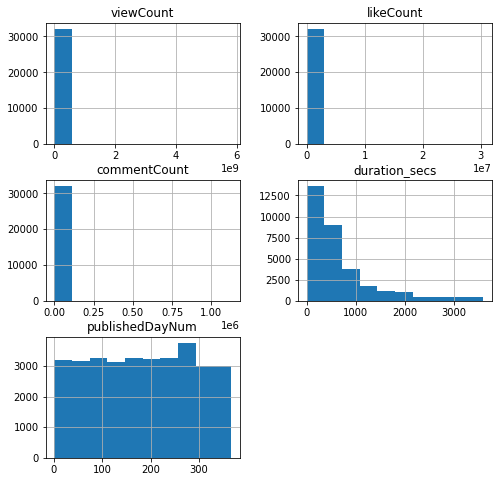

In [133]:
preproc2_df.drop('categoryId', axis=1).hist(figsize=(8,8));

We could consider applying a transformation to the data, to help address the heavy left-skew on most numerical features.

Let's quickly set the same steps up for the `overall_stats_raw_df` df.

In [21]:
overall_stats_raw_df.head()

,viewCount,subscriberCount,videoCount,channelName
0,104555954,886000,81,Historia Civilis
1,38446899,589000,55,Feature History
2,555990509,2020000,447,Overly Sarcastic Productions
3,968644695,4350000,1002,Timeline - World History Documentaries
4,84993307,707000,76,BazBattles


In [22]:
overall_stats_raw_df.dtypes

viewCount          object
subscriberCount    object
videoCount         object
channelName        object
dtype: object

In [23]:
ov_features = ['channelName', 'viewCount', 'subscriberCount', 'videoCount']
ov_stats_pre_df1 = create_dataset(overall_stats_raw_df, ov_features, primary=False)

In [24]:
ov_stats_pre_df1.head()

,channelName,viewCount,subscriberCount,videoCount
0,historia civilis,104555954,886000,81
1,feature history,38446899,589000,55
2,overly sarcastic productions,555990509,2020000,447
3,timeline - world history documentaries,968644695,4350000,1002
4,bazbattles,84993307,707000,76


In [25]:
ov_stats_pre_df1.isna().sum()

channelName        0
viewCount          0
subscriberCount    0
videoCount         0
dtype: int64

With both the datasets ready and a basic relation overview amongst the features, we can now move onto the phase of text processing to make it machine interpretable.